In [725]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

In [726]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [727]:
import seaborn as sns

In [728]:
courses_df = pd.read_csv(r"courses.csv")
courses_df.sample(5)

course_id           course_name              course_category  teacher_id  \
16         17       Product Manager  Product & Business Strategy         NaN   
22         23                 Cyber      Data Science & Security        18.0   
44         45          AI Developer         Software Development         9.0   
31         32       Product Manager  Product & Business Strategy        28.0   
0           1  Full Stack Developer         Software Development        30.0   

   course_start_date  
16        2023-07-15  
22        2023-10-04  
44        2023-06-27  
31        2023-01-14  
0         2023-08-17

In [729]:
students_df = pd.read_csv(r"students.csv")
students_df.sample(5)

id first_name    last_name  gender   age       city          education  \
391  392     Herold        Zouch    Male  18.0  Jerusalem        High school   
398  399     Feliza  Grzesiewicz  Female  45.0  Jerusalem        High school   
119  120   Vivienne         Greg  Female  37.0   Ashkelon  Bachelor's degree   
401  402       Clem      Valerio    Male  27.0     Ashdod        High school   
359  360   Augustus         Beat    Male  34.0      Haifa  Bachelor's degree   

                        email  
391  hzouchav@paginegialle.it  
398  fgrzesiewiczb2@cisco.com  
119   vgreg3b@themeforest.net  
401  cvaleriob5@homestead.com  
359  abeat9z@reverbnation.com

In [730]:
stu_cour_df = pd.read_csv(r"studnet_course.csv")
stu_cour_df.sample(5)

id  student_id  course_id  final_grade
625  626         265         32         58.0
963  964         270         50         75.0
921  922         445         29         68.0
345  346         187         38         90.0
944  945          61         33         78.0

In [731]:
teachers_df = pd.read_csv(r"teachers.csv")
teachers_df.sample(5)

id first_name  last_name  gender  years_of_experience   salary
10  11  Ammamaria   Claypole  Female                    8  32900.0
12  13     Inessa      Kubas  Female                    9      NaN
30  31   Grantham  Barizeret    Male                    3  19600.0
3    4    Tamarah    Hulcoop  Female                    4  21600.0
34  35      Brock     Webber    Male                    4  21600.0

## Data Prep.

### Exercise 1.
#### a.

In [732]:
stu_copy_df = students_df.copy()
duplicate_rows = stu_copy_df[stu_copy_df.duplicated(subset='email', keep=False)]
print(duplicate_rows)

      id first_name  last_name  gender   age       city          education  \
15    16    Sheffie     Fullom    Male  41.0      Haifa  Bachelor's degree   
26    27   Kaitlynn    Tansley  Female  39.0   Ashkelon       No education   
32    33     Wileen     Thirst     NaN  48.0   Ashkelon        High school   
38    39       Neil     Lipson    Male  27.0   Ashkelon        High school   
65    66     Juieta   Bodycote  Female  37.0   Ashkelon       No education   
72    73   Jermaine      Gabey  Female  36.0  Jerusalem  Bachelor's degree   
88    89      Danny  Haythorne    Male  42.0   Tel Aviv       No education   
90    91    Opaline  Satterlee  Female  34.0   Tel Aviv    Master's degree   
205  206      Cesar      Lghan    Male   NaN   Tel Aviv        High school   

                     email  
15         sfullomf@wp.com  
26       ktansleyq@soup.io  
32      wthirstw@youku.com  
38   nlipson12@foxnews.com  
65         sfullomf@wp.com  
72       ktansleyq@soup.io  
88      wthirstw

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

In [733]:
stu_copy_df['score'] = students_df.apply(lambda row: row.count(), axis=1)
stu_copy_df.sample(5)

id  first_name  last_name  gender   age       city          education  \
315  316  Eziechiele  Roobottom     NaN  34.0  Kfar Saba        High school   
227  228     Conrade     Pawson    Male  12.0    Netanya  Bachelor's degree   
480  481       Reena    Yarnley  Female  36.0    Bat Yam       No education   
380  381     Horatio    Goulter    Male  27.0  Ramat Gan        High school   
317  318       Ilyse     Haggas  Female  29.0  Beersheba        High school   

                     email  score  
315  eroobottom8r@dell.com      7  
227  cpawson6b@dedecms.com      8  
480     ryarnleydc@umn.edu      8  
380     hgoulterak@bbb.org      8  
317     ihaggas8t@hibu.com      8

In [734]:
rm_dup = stu_copy_df.loc[stu_copy_df.groupby('email')['score'].idxmax()].drop(columns=['score'])
ids_rm = set(stu_copy_df['id']) - set(rm_dup['id'])
rm_dup.sample(5)

id first_name   last_name  gender   age       city          education  \
292  293       Lief     Brayley    Male  57.0  Jerusalem    Doctoral degree   
55    56   Sheppard  Le Pruvost    Male  24.0   Ashkelon       No education   
116  117      Suzie   Greendale  Female  26.0   Tel Aviv        High school   
392  393     Matias        Akid     NaN  42.0  Jerusalem       No education   
113  114   Alphonso      Werrit     NaN  37.0  Jerusalem  Bachelor's degree   

                          email  
292        lbrayley84@baidu.com  
55   slepruvost1j@microsoft.com  
116     sgreendale38@meetup.com  
392             makidaw@nih.gov  
113       awerrit35@t-online.de

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html

In [735]:
duplicate_rows = rm_dup[rm_dup.duplicated(subset='email', keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [id, first_name, last_name, gender, age, city, education, email]
Index: []


#### No duplicate rows in rm_dup

#### b.

##### only association is with student courses df

In [736]:
id_map = stu_copy_df[stu_copy_df['id'].isin(ids_rm)]
id_map

id first_name  last_name  gender   age       city          education  \
32    33     Wileen     Thirst     NaN  48.0   Ashkelon        High school   
65    66     Juieta   Bodycote  Female  37.0   Ashkelon       No education   
72    73   Jermaine      Gabey  Female  36.0  Jerusalem  Bachelor's degree   
90    91    Opaline  Satterlee  Female  34.0   Tel Aviv    Master's degree   
205  206      Cesar      Lghan    Male   NaN   Tel Aviv        High school   

                     email  score  
32      wthirstw@youku.com      7  
65         sfullomf@wp.com      8  
72       ktansleyq@soup.io      8  
90   nlipson12@foxnews.com      8  
205        sfullomf@wp.com      7

In [737]:
id_map = stu_copy_df[stu_copy_df['id'].isin(ids_rm)].set_index('id')['email'].to_dict()
id_map

{33: 'wthirstw@youku.com',
 66: 'sfullomf@wp.com',
 73: 'ktansleyq@soup.io',
 91: 'nlipson12@foxnews.com',
 206: 'sfullomf@wp.com'}

In [738]:
retained_ids = rm_dup[['id', 'email']].set_index('email')['id'].to_dict()
id_mapping = {old_id: retained_ids[email] for old_id, email in id_map.items()}

In [739]:
id_mapping = {int(k): int(v) for k, v in id_mapping.items()}
id_mapping


{33: 89, 66: 16, 73: 27, 91: 39, 206: 16}

https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.Series.items.html#pandas.Series.items

In [740]:
stu_cour_copy_df = stu_cour_df.copy()
stu_cour_copy_df.sample(5)

id  student_id  course_id  final_grade
489  490         470         18         71.0
491  492         262          4         59.0
973  974         494         39         67.0
876  877         151          4         60.0
445  446          59          3         56.0

In [741]:
stu_cour_copy_df[stu_cour_copy_df['student_id'].isin(ids_rm)]

id  student_id  course_id  final_grade
190  191          66         31         83.0
222  223          33         10         74.0
265  266          33         31         81.0
338  339          91          2         77.0
432  433         206         33         52.0
583  584         206          7         75.0
591  592          91         19         61.0
597  598          73         43         74.0
606  607         206         43         87.0
670  671          66         21         75.0
728  729          33         34         65.0
753  754         206         20         61.0
989  990         206         15         70.0

In [742]:
# stu_cour_copy_df['student_id'] = stu_cour_copy_df['student_id'].apply(lambda student_id: id_mapping[student_id] if student_id in ids_rm else student_id)
# did not work

# stu_cour_copy_df['student_id'] = stu_cour_copy_df.replace(id_mapping)
# did not work

for key in id_mapping.keys():
    stu_cour_copy_df.loc[stu_cour_copy_df['student_id'] == key, 'student_id'] = id_mapping[key]


In [743]:
stu_cour_copy_df[stu_cour_copy_df['student_id'].isin(ids_rm)]

Empty DataFrame
Columns: [id, student_id, course_id, final_grade]
Index: []

### Exercise 2.

Student df

In [744]:
stu_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          500 non-null    int64  
 1   first_name  500 non-null    object 
 2   last_name   500 non-null    object 
 3   gender      435 non-null    object 
 4   age         471 non-null    float64
 5   city        500 non-null    object 
 6   education   500 non-null    object 
 7   email       500 non-null    object 
 8   score       500 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 35.3+ KB


In [745]:
gender_nan = stu_copy_df['gender'].isnull().sum() 
print(f"Gender missing values {(gender_nan/stu_copy_df.shape[0])*100}%")

age_nan = stu_copy_df['age'].isnull().sum() 
print(f"Age missing values {(age_nan/stu_copy_df.shape[0])*100}%")



Gender missing values 13.0%
Age missing values 5.800000000000001%


In [746]:
stu_copy_df['age'].describe()

count    471.000000
mean      34.713376
std       10.094480
min        4.000000
25%       28.000000
50%       34.000000
75%       41.500000
max       61.000000
Name: age, dtype: float64

Gender cant be filled by mean or median, but is 13% missing, it is left as nan.

Age mean and median both colse to 34, I chose to use median.

In [747]:
stu_copy_df['age'] = stu_copy_df['age'].fillna(stu_copy_df['age'].median())

In [748]:
stu_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          500 non-null    int64  
 1   first_name  500 non-null    object 
 2   last_name   500 non-null    object 
 3   gender      435 non-null    object 
 4   age         500 non-null    float64
 5   city        500 non-null    object 
 6   education   500 non-null    object 
 7   email       500 non-null    object 
 8   score       500 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 35.3+ KB


Student_Course df

In [749]:
stu_cour_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   student_id   1000 non-null   int64  
 2   course_id    1000 non-null   int64  
 3   final_grade  938 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 31.4 KB


In [750]:
grade_nan = stu_cour_copy_df['final_grade'].isnull().sum() 
print(f"Grade missing values {(grade_nan/stu_cour_copy_df.shape[0])*100}%")


Grade missing values 6.2%


In [751]:
stu_cour_copy_df['final_grade'].describe()

count    938.000000
mean      69.700426
std        9.920539
min       40.000000
25%       63.000000
50%       70.000000
75%       76.000000
max      107.000000
Name: final_grade, dtype: float64

In [752]:
stu_cour_copy_df['final_grade'] = stu_cour_copy_df['final_grade'].fillna(stu_cour_copy_df['final_grade'].median())

In [753]:
stu_cour_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   student_id   1000 non-null   int64  
 2   course_id    1000 non-null   int64  
 3   final_grade  1000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 31.4 KB


Courses df

In [754]:
course_copy = courses_df.copy()
course_copy.sample(5)

course_id      course_name          course_category  teacher_id  \
38         39  DevOps Engineer     Software Development        21.0   
33         34            Cyber  Data Science & Security        25.0   
4           5  DevOps Engineer     Software Development        21.0   
45         46  DevOps Engineer     Software Development         NaN   
8           9     AI Developer     Software Development         7.0   

   course_start_date  
38        2023-04-07  
33        2023-02-24  
4         2023-01-23  
45        2023-05-28  
8         2023-09-09

In [755]:
course_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          50 non-null     int64  
 1   course_name        50 non-null     object 
 2   course_category    50 non-null     object 
 3   teacher_id         45 non-null     float64
 4   course_start_date  50 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [756]:
teach_nan = course_copy['teacher_id'].isnull().sum() 
print(f"Teacher id missing values {(teach_nan/course_copy.shape[0])*100}%")

Teacher id missing values 10.0%


Teacher id is essential/mandatory so rows should be removed.

In [757]:
course_copy = course_copy.dropna()

In [758]:
course_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_id          45 non-null     int64  
 1   course_name        45 non-null     object 
 2   course_category    45 non-null     object 
 3   teacher_id         45 non-null     float64
 4   course_start_date  45 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


Teacher df

In [759]:
teach_copy = teachers_df.copy()
teach_copy.sample(5)

id first_name    last_name  gender  years_of_experience   salary
15  16     Minnie  Tattershall  Female                    7  30300.0
30  31   Grantham    Barizeret    Male                    3  19600.0
12  13     Inessa        Kubas  Female                    9      NaN
3    4    Tamarah      Hulcoop  Female                    4  21600.0
19  20  Gabriello       Jancso    Male                    2  16400.0

In [760]:
teach_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   35 non-null     int64  
 1   first_name           35 non-null     object 
 2   last_name            35 non-null     object 
 3   gender               32 non-null     object 
 4   years_of_experience  35 non-null     int64  
 5   salary               32 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


In [761]:
gender_nan = teach_copy['gender'].isnull().sum() 
print(f"Gender missing values {(gender_nan/teach_copy.shape[0])*100}%")

salary_nan = teach_copy['salary'].isnull().sum() 
print(f"Salary missing values {(salary_nan/teach_copy.shape[0])*100}%")

Gender missing values 8.571428571428571%
Salary missing values 8.571428571428571%


In [762]:
teach_copy['salary'].describe()

count       32.000000
mean     26721.875000
std       8784.140194
min      12400.000000
25%      21400.000000
50%      26250.000000
75%      34175.000000
max      41400.000000
Name: salary, dtype: float64

Gender cant be filled by mean or median, but is 8.57% missing, it is left as nan.

Salery mean and median both colse to 26.5K, I chose to use mean.

In [763]:
teach_copy['salary'] = teach_copy['salary'].fillna(teach_copy['salary'].mean())

In [764]:
teach_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   35 non-null     int64  
 1   first_name           35 non-null     object 
 2   last_name            35 non-null     object 
 3   gender               32 non-null     object 
 4   years_of_experience  35 non-null     int64  
 5   salary               35 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


## Data Analysis

### Exercise 1.
#### a.

In [765]:
bar_data = stu_copy_df['gender'].value_counts()
bar_data

gender
Male      220
Female    215
Name: count, dtype: int64

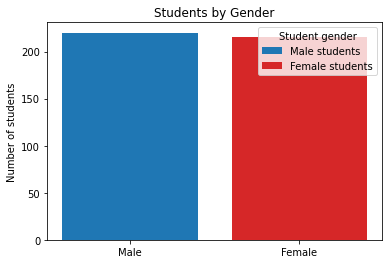

In [766]:
fig, ax = plt.subplots()

bar_labels = ['Male students', 'Female students']
bar_colors = ['tab:blue', 'tab:red']

ax.bar(bar_data.index, bar_data.values, label=bar_labels, color=bar_colors)

ax.set_ylabel('Number of students')
ax.set_title('Students by Gender')
ax.legend(title='Student gender')

plt.show()

#### b.

<Axes: xlabel='age', ylabel='Count'>

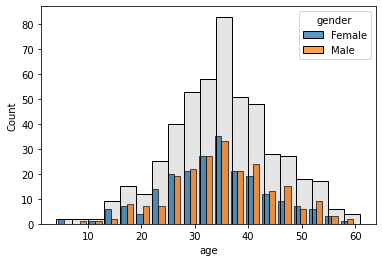

In [767]:
sns.histplot(data = stu_copy_df, x = 'age', hue = 'gender', multiple = 'dodge', shrink = .8, binwidth = 3)
sns.histplot(data=stu_copy_df, x='age', binwidth=3, color='black', alpha=0.1)

https://seaborn.pydata.org/generated/seaborn.histplot.html

#### c.

In [768]:
cities = stu_copy_df['city'].value_counts()
cities

city
Tel Aviv         113
Haifa             94
Jerusalem         63
Ashkelon          56
Ashdod            26
Holon             18
Netanya           17
Beersheba         16
Herzliya          16
Kfar Saba         16
Bnei Brak         15
Bat Yam           15
Petah Tikva       12
Rishon LeZion     12
Ramat Gan         11
Name: count, dtype: int64

In [769]:
print(f'{cities.index[0]} is the city with the highest number of registered students')
print(f'{cities.index[cities.size - 1]} is the city with the lowest number of registered students')


Tel Aviv is the city with the highest number of registered students
Ramat Gan is the city with the lowest number of registered students


### Exercise 2.
#### a.

In [770]:
catg = course_copy['course_category'].value_counts()
catg

course_category
Software Development           30
Data Science & Security         8
Product & Business Strategy     7
Name: count, dtype: int64

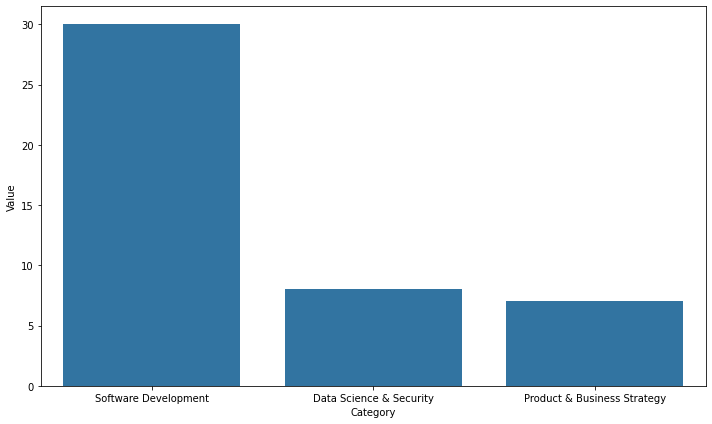

In [771]:
catg_df = catg.reset_index()
catg_df.columns = ['Category', 'Value']
fig, ax = plt.subplots(figsize=(10, 6))  

sns.barplot(data = catg_df, x = 'Category', y = 'Value')
plt.tight_layout()

#### b.

In [772]:
# course_n = course_copy.groupby(['course_category', 'course_name']).count()
course_n = course_copy[['course_category', 'course_name']].drop_duplicates().reset_index(drop=True)
course_n

course_category           course_name
0         Software Development  Full Stack Developer
1  Product & Business Strategy       Product Manager
2         Software Development          AI Developer
3         Software Development       DevOps Engineer
4      Data Science & Security                 Cyber
5         Software Development                    QA

#### c.

In [773]:
course_copy.sample(5)

course_id      course_name              course_category  teacher_id  \
33         34            Cyber      Data Science & Security        25.0   
7           8     AI Developer         Software Development        14.0   
44         45     AI Developer         Software Development         9.0   
41         42  Product Manager  Product & Business Strategy        10.0   
37         38            Cyber      Data Science & Security         9.0   

   course_start_date  
33        2023-02-24  
7         2023-03-25  
44        2023-06-27  
41        2023-12-29  
37        2023-09-30

In [774]:
course_copy['course_start_date'] = pd.to_datetime(course_copy['course_start_date'], format='%Y-%m-%d', errors='coerce')
# course_copy.set_index('course_start_date', inplace=True)

In [775]:
course_copy.sample(5)

course_id      course_name          course_category  teacher_id  \
46         47     AI Developer     Software Development         3.0   
11         12            Cyber  Data Science & Security        20.0   
14         15  DevOps Engineer     Software Development        17.0   
7           8     AI Developer     Software Development        14.0   
23         24     AI Developer     Software Development        18.0   

   course_start_date  
46        2023-04-15  
11        2023-11-07  
14        2023-10-11  
7         2023-03-25  
23        2023-10-11

In [776]:
# course_copy.resample(rule='ME').count()['course_name'].value_counts()
course_m = course_copy[['course_start_date', 'course_name']]
course_m['course_start_date'] = course_m['course_start_date'].dt.strftime('%Y-%m')
course_m.sample(5)

/tmp/ipykernel_6103/23629051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course_m['course_start_date'] = course_m['course_start_date'].dt.strftime('%Y-%m')


course_start_date      course_name
25           2023-12            Cyber
40           2023-02  DevOps Engineer
5            2023-12     AI Developer
38           2023-04  DevOps Engineer
36           2023-02     AI Developer

In [777]:
cur_cnt = course_m.groupby(['course_start_date', 'course_name']).count()
cur_cnt

Empty DataFrame
Columns: []
Index: [(2023-01, DevOps Engineer), (2023-01, Product Manager), (2023-02, AI Developer), (2023-02, Cyber), (2023-02, DevOps Engineer), (2023-03, AI Developer), (2023-03, Cyber), (2023-04, AI Developer), (2023-04, DevOps Engineer), (2023-04, Full Stack Developer), (2023-04, Product Manager), (2023-05, Cyber), (2023-06, AI Developer), (2023-06, DevOps Engineer), (2023-06, Product Manager), (2023-08, Full Stack Developer), (2023-09, AI Developer), (2023-09, Cyber), (2023-09, Full Stack Developer), (2023-10, AI Developer), (2023-10, Cyber), (2023-10, DevOps Engineer), (2023-10, Full Stack Developer), (2023-10, Product Manager), (2023-11, AI Developer), (2023-11, Cyber), (2023-11, Full Stack Developer), (2023-12, AI Developer), (2023-12, Cyber), (2023-12, Full Stack Developer), (2023-12, Product Manager), (2023-12, QA)]

In [778]:
cur_cnt.groupby(['course_start_date']).value_counts()

course_start_date
2023-01    2
2023-02    3
2023-03    2
2023-04    4
2023-05    1
2023-06    3
2023-08    1
2023-09    3
2023-10    5
2023-11    3
2023-12    5
Name: count, dtype: int64

In [779]:
line_df = cur_cnt.groupby(['course_start_date']).value_counts().reset_index()
line_df.columns = ['Month', 'Course_count']
line_df

Month  Course_count
0   2023-01             2
1   2023-02             3
2   2023-03             2
3   2023-04             4
4   2023-05             1
5   2023-06             3
6   2023-08             1
7   2023-09             3
8   2023-10             5
9   2023-11             3
10  2023-12             5

#### d.

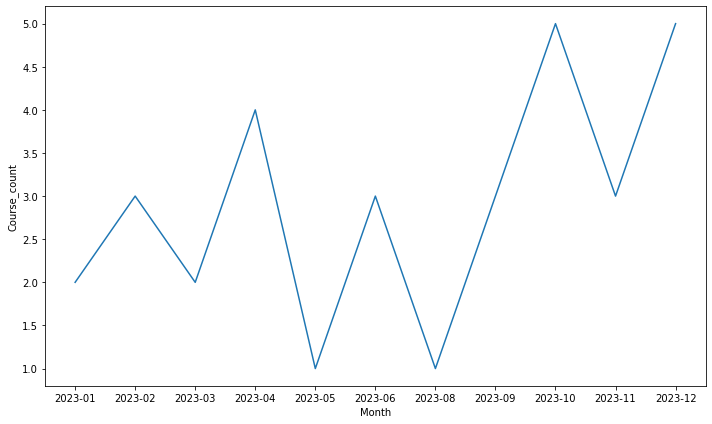

In [780]:
fig, ax = plt.subplots(figsize=(10, 6))  
sns.lineplot(data=line_df, x='Month', y='Course_count')
plt.tight_layout()

### Exercise 3.
#### a.

In [781]:
teach_copy.sample(5)

id first_name last_name  gender  years_of_experience   salary
16  17    Jo-anne   Bagehot  Female                    8  35000.0
31  32     Rodger   Bratley    Male                    4  21800.0
1    2       Arty    Noonan    Male                    1  12600.0
4    5    Kennett   Bugdale    Male                    8  33900.0
7    8  Theodoric     Ewles     NaN                    6  27500.0

In [782]:
teach_copy['salary'].describe()

count       35.000000
mean     26721.875000
std       8387.656701
min      12400.000000
25%      21600.000000
50%      26721.875000
75%      33750.000000
max      41400.000000
Name: salary, dtype: float64

The Mean and Median selary values for a teacher are 26721.875

#### b.

<Axes: xlabel='years_of_experience', ylabel='salary'>

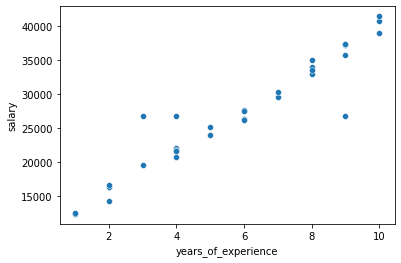

In [783]:
sns.scatterplot(data = teach_copy, x = 'years_of_experience', y = 'salary')

The chart shows corelation, but I want to be sure.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [784]:
teach_copy[['years_of_experience', 'salary']].corr()

years_of_experience    salary
years_of_experience             1.000000  0.957471
salary                          0.957471  1.000000

#### Correlation close to 1 very high correlation.

### Exercise 4.
#### a.

In [785]:
teach_copy.sample(5)

id first_name last_name  gender  years_of_experience     salary
18  19        Ida  Conibear  Female                    9  37200.000
13  14   Kimberli   Tonsley  Female                    9  35800.000
8    9       Mona  Hallihan  Female                    3  26721.875
19  20  Gabriello    Jancso    Male                    2  16400.000
0    1     Madlen  Conybear  Female                    6  27600.000

In [786]:
course_copy.sample(5)

course_id           course_name              course_category  teacher_id  \
47         48       Product Manager  Product & Business Strategy         2.0   
36         37          AI Developer         Software Development         5.0   
28         29          AI Developer         Software Development        28.0   
17         18  Full Stack Developer         Software Development        11.0   
7           8          AI Developer         Software Development        14.0   

   course_start_date  
47        2023-10-17  
36        2023-02-21  
28        2023-04-06  
17        2023-11-23  
7         2023-03-25

In [787]:
cour_cnt = course_copy.groupby('teacher_id').count()['course_id'] 
max_cnt = cour_cnt.max()
id_list = cour_cnt[cour_cnt == max_cnt].index.to_list()

In [788]:
teach_copy[teach_copy['id'].isin(id_list)]

id first_name  last_name  gender  years_of_experience     salary
2    3   Jillayne    Younger  Female                    4  22000.000
4    5    Kennett    Bugdale    Male                    8  33900.000
8    9       Mona   Hallihan  Female                    3  26721.875
19  20  Gabriello     Jancso    Male                    2  16400.000
20  21    Desirae  Grishunin  Female                    6  26300.000

#### b.

In [789]:
stu_copy_df.sample(5)

id first_name  last_name  gender   age      city          education  \
46    47     Bogart    McAllen    Male  35.0  Tel Aviv        High school   
358  359   Humfried     Cerith    Male  34.0     Haifa  Bachelor's degree   
271  272  Margarita    Bennell  Female  46.0   Bat Yam        High school   
47    48      Elyse  Dunbobbin  Female  35.0   Netanya  Bachelor's degree   
172  173  Augustine     Wooles     NaN  24.0     Haifa  Bachelor's degree   

                           email  score  
46          bmcallen1a@cisco.com      8  
358           hcerith9y@furl.net      8  
271  mbennell7j@chronoengine.com      8  
47          edunbobbin1b@psu.edu      8  
172          awooles4s@cisco.com      7

In [790]:
stu_cour_copy_df.sample(5)

id  student_id  course_id  final_grade
828  829         456         16         71.0
249  250         132         10         74.0
579  580         464         12         68.0
597  598          27         43         74.0
773  774           2         32         66.0

In [791]:
stu_gr = pd.merge(stu_copy_df, stu_cour_copy_df, how='inner', left_on='id', right_on='student_id')
stu_gr.sample(5)

id_x  first_name last_name  gender   age       city          education  \
112    51  Alexandros   Wootton    Male  44.0     Ashdod  Bachelor's degree   
604   305       Mabel     Poley  Female  38.0   Tel Aviv        High school   
323   164        Zara    Goaley  Female  29.0  Bnei Brak       No education   
792   401     Lorilyn    Gammon  Female  20.0  Jerusalem        High school   
115    52       Waldo   Marcham    Male  34.0   Tel Aviv    Master's degree   

                          email  score  id_y  student_id  course_id  \
112      awootton1e@booking.com      8   303          51          7   
604   mpoley8g@miitbeian.gov.cn      8   459         305         25   
323          zgoaley4j@ox.ac.uk      8   745         164         45   
792         lgammonb4@fotki.com      8   972         401         50   
115  wmarcham1f@bizjournals.com      7   400          52         21   

     final_grade  
112         75.0  
604         79.0  
323         58.0  
792         94.0  
115         82.0

In [792]:
edu_dat = stu_gr[['education','final_grade']]
edu_dat.sample(5)

education  final_grade
709     No education         78.0
790      High school         83.0
810      High school         52.0
270  Master's degree         72.0
726      High school         61.0

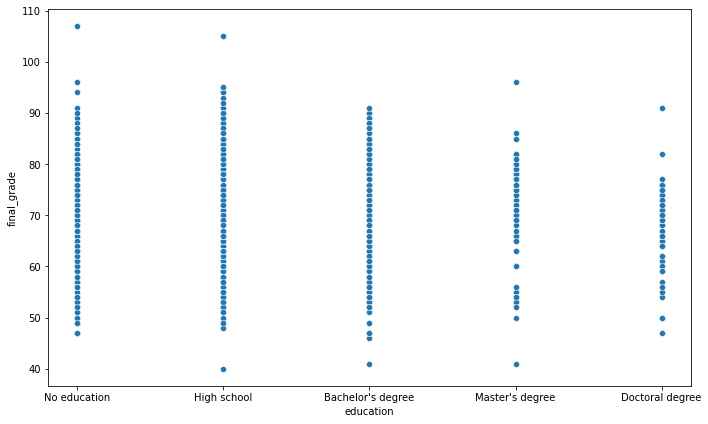

In [793]:
fig, ax = plt.subplots(figsize=(10, 6))  
sns.scatterplot(data = edu_dat, x = 'education', y = 'final_grade')
plt.tight_layout()

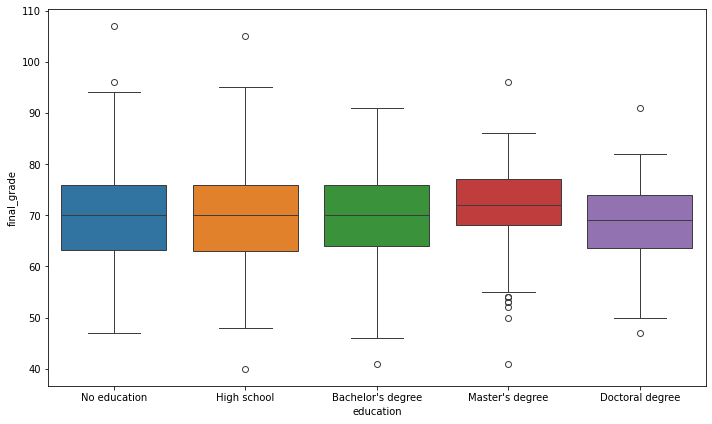

In [794]:
fig, ax = plt.subplots(figsize=(10, 6))  
sns.boxplot(data = edu_dat, x = 'education', y = 'final_grade', hue = 'education' )
plt.tight_layout()

There is no linear trand between education and final grade.

#### c.

In [795]:
course_copy.sample(5)

course_id           course_name          course_category  teacher_id  \
19         20  Full Stack Developer     Software Development        20.0   
27         28  Full Stack Developer     Software Development        20.0   
20         21  Full Stack Developer     Software Development        22.0   
39         40          AI Developer     Software Development        12.0   
10         11                 Cyber  Data Science & Security         9.0   

   course_start_date  
19        2023-09-23  
27        2023-04-09  
20        2023-08-23  
39        2023-09-02  
10        2023-10-13

In [796]:
cour_gr = pd.merge(course_copy, stu_cour_copy_df, how='inner', on='course_id')
cour_gr.sample(5)

course_id           course_name          course_category  teacher_id  \
696         38                 Cyber  Data Science & Security         9.0   
620         35          AI Developer     Software Development        21.0   
614         35          AI Developer     Software Development        21.0   
243         15       DevOps Engineer     Software Development        17.0   
322         21  Full Stack Developer     Software Development        22.0   

    course_start_date   id  student_id  final_grade  
696        2023-09-30  616         282         79.0  
620        2023-06-22  819         163         69.0  
614        2023-06-22  712         335         69.0  
243        2023-10-11  692         114         66.0  
322        2023-08-23  222         237         75.0

In [797]:
bar_dat = cour_gr.groupby('course_name')['final_grade'].mean()
bar_dat

course_name
AI Developer            70.059649
Cyber                   69.554839
DevOps Engineer         69.428571
Full Stack Developer    69.303483
Product Manager         70.151079
QA                      67.941176
Name: final_grade, dtype: float64

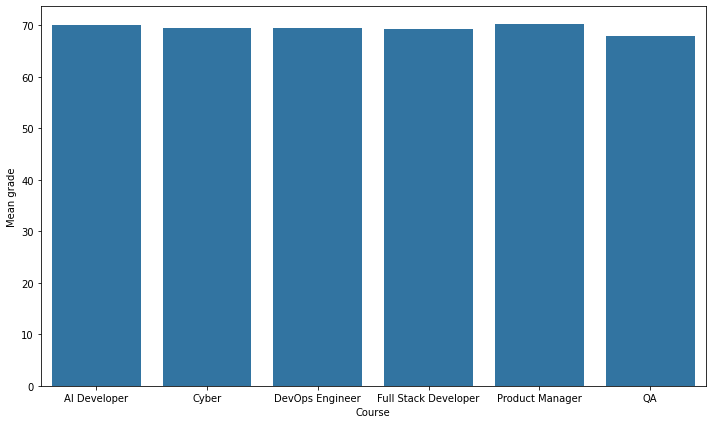

In [798]:
bar_df = bar_dat.reset_index()
bar_df.columns = ['Course', 'Mean grade']
fig, ax = plt.subplots(figsize=(10, 6))  

sns.barplot(data = bar_df, x = 'Course', y = 'Mean grade')
plt.tight_layout()

Mean grades are more or less similar in all courses they are 68 to 70.

#### d.

In [799]:
stu_gr.sample(10)

id_x  first_name      last_name  gender   age           city  \
603   305       Mabel          Poley  Female  38.0       Tel Aviv   
166    79        Jane      Philpault  Female  34.0          Haifa   
208   103     Kingsly         Hannam    Male  50.0      Bnei Brak   
999   500      Gillan         Terram  Female  34.0          Haifa   
664   333   Jacquelyn     Addionizio  Female  18.0    Petah Tikva   
826   422  Stephannie          Perse  Female  18.0       Ashkelon   
508   254      Ruthie  Tomaszkiewicz  Female  49.0       Herzliya   
122    55     Gusella         Wadlow  Female  30.0       Ashkelon   
509   255      Mikael         Cluitt     NaN  39.0  Rishon LeZion   
94     42        Alic         Kliesl    Male  29.0      Jerusalem   

             education                            email  score  id_y  \
603        High school        mpoley8g@miitbeian.gov.cn      8    77   
166  Bachelor's degree           jphilpault26@google.cn      7   436   
208       No education              khannam2u@google.cn      8   398   
999  Bachelor's degree         gterramdv@friendfeed.com      8   691   
664       No education      jaddionizio98@blinklist.com      8   465   
826        High school              spersebp@spiegel.de      8    76   
508  Bachelor's degree  rtomaszkiewicz71@privacy.gov.au      8   631   
122       No education            gwadlow1i@histats.com      8   331   
509  Bachelor's degree             mcluitt72@rambler.ru      7   150   
94     Master's degree              akliesl15@cam.ac.uk      8   241   

     student_id  course_id  final_grade  
603         305         27         83.0  
166          79         13         64.0  
208         103         49         70.0  
999         500         13         73.0  
664         333         23         71.0  
826         422         36         63.0  
508         254         43         64.0  
122          55         43         78.0  
509         255         29         73.0  
94           42         24         66.0

In [800]:
fin_gr = stu_gr.groupby(['student_id', 'course_id'])['final_grade'].max()
fin_gr_df = fin_gr.reset_index()
fin_gr_df.columns = ['student_id', 'course_id','grade']
fin_gr_df

student_id  course_id  grade
0             1         38   75.0
1             1         47   63.0
2             2         21   49.0
3             2         32   66.0
4             2         40   74.0
..          ...        ...    ...
973         499          3   81.0
974         499         24   66.0
975         500          5   66.0
976         500          6   61.0
977         500         13   73.0

[978 rows x 3 columns]

In [801]:
fin_gr_df.groupby(['student_id'])['grade'].mean()

student_id
1      69.000000
2      65.750000
3      72.000000
4      81.500000
5      76.500000
         ...    
496    63.000000
497    71.000000
498    68.500000
499    73.500000
500    66.666667
Name: grade, Length: 433, dtype: float64

In [803]:
stu_gr_df = fin_gr_df.groupby(['student_id'])['grade'].mean().reset_index()
stu_gr_df.columns = ['student_id', 'final_college_grade']
stu_gr_df

student_id  final_college_grade
0             1            69.000000
1             2            65.750000
2             3            72.000000
3             4            81.500000
4             5            76.500000
..          ...                  ...
428         496            63.000000
429         497            71.000000
430         498            68.500000
431         499            73.500000
432         500            66.666667

[433 rows x 2 columns]